#Image steganography

Steganography, in general, is a technique which consists of concealing the very existence of a message, as opposed to cryptography, which conceals the understandable form of a message from third parties.

Terminology of steganography:
- cover object - an object (e.g. image, sound file), which is used as a carrier for a hidden message
- stego object - an object which is carrying a hidden message

A message is combined with the use of some algorithm, which is designed in that way as to the difference between cover and stego objects is not visible to a naked eye and preferably cannot be detected with use of tools like statistical analysis.

Image steganography is concerned with hiding messages in image files. Its methods can be classified into two main types: spatial domain and transfer domain. They are described below.

##Spatial domain methods

Spatial domain image steganography methods include:
  - least significant bit (LSB) - basic and the easiest method. Message is
hidden in the least significant bits of image pixels. Changing the least significant bit of a pixel does not result in much difference of colour and thus the stego image looks similar to the original image. In terms of a method of choosing the bit values LSB methods can be classified into two main categories: LSB replacement and LSB matching. In case of LSB replacement, the least significant bit of each pixel of the cover image is replaced by the next bit of the secret message to be embedded. In LSB matching, if there is a mismatch between least significant bit of a byte in the cover image and bit of the secret message to be embedded, then embedding, in general, is done by increasing or decreasing randomly the content of the byte of the cover image by 1, except at the boundary values.  
The LSB replacement method is implemented below.

- pixel value differencing - takes advantage of the fact that human perception is better suited to notice small relative differences than big absolute ones. PDV methods hide more information in areas of more variability (edges, colour changes) and less in areas of constant colour. The number of bits of message is determined by the difference between a given pixel and its neighbours. This can achieve less visible changes in an image with the same data-hiding capability than plain LSB-based methods

- edge based - an image is first run through some well-established edge detection algorithm, and only then an LSB-based method is run on pixels which were determined to be parts of edges.

- random pixel selection - the data is hidden in some randomly selected pixels, pixels can be selected according to some pseudo-random method, similar to scrambling, so as to be deterministic and possible to decode

- histogram based - in histogram based data hiding
technique the crucial information is embedded into the
image histogram. Pairs of peak points and zero points are
used to achieve low embedding distortion with high data hiding capacity.

General advantages of spatial domain techniques:
- stego-images tend to be less degraded, more similar to originals,
- more information can be stored in an image,
- low mathematical complexity.

Disadvantages:
- less robust, the hidden data can be lost with image
manipulation.
- hidden data can be easily destroyed by simple attacks.
- the information may be segmented on a particular
part of image.
- hidden message can be lost due to format change.

##Transform domain techinques

Transformation or frequency domain techniques are concerned with manipulation of the representation of the image in frequency or some other domain rather  than  the  image  itself. This results in different characteristics of the stego vs original image than in spatial domain methods. Domain transformation are often based on and are similar to well-known Fourier transform.

The most common transform domain techinques are based on Descrete Cosine Transform - used in lossy compression in JPEG format. 

A summary of the process of JPEG compression:
1. The image is divided into 8x8 blocks of pixels.
2. Descrete Cosine Transform is applied to each block.
3. DCT coefficients are quantized to increase compression.
4. DCT coefficients are stored and compressed with Huffman encoding 

DCT matrix itself represents contribution of certain preconfigured shapes, a linear combination of different shapes.
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/2/24/DCT-8x8.png'
title = "Source: Wikimedia Commons" />
<figcaption>Patterns represented by DCT matrix
(source: Wikimedia Commons) </figcaption></center>
</figure>

As most 8x8 blocks of pixels in real applications are rather monotonous, matrix elements in upper-right corner will have higher values, whereas those in lower-left will be almost always zero. Coefficents of each 8x8 block are stored in a zig-zag fashion and encoded using Huffman coding, which has the ability to shorten long sequences of constant symbols, taking advantage of the fact that most of high-frequency coefficients are zeros.

<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/e/e1/Zigzag_scanning.jpg' title = "Source: Wikimedia Commons" />
<figcaption>Zigzag pattern of storing coefficients (source: Wikimedia Commons)</figcaption></center>
</figure>

A common steganographic algorithm using DCT is JSteg. The best coefficients to hide a message in are those representing low frequencies, but not the lowest ones. The high frequency coefficients are, as mentioned above, mostly zero, thus tampering with them could easily rise suspition. The lowest frequency ones are on the other hand resposible for the most information in the block and manipulating them could have visible effects on the image. Also the DC components (matrix element at (0,0) representing constant colour) are stored in a special fashion in JPEG fromat and should not be changed because they could easily destroy the intelligiblity of the image


##Methods of steganography detection

Steganography detection, also called steganalysis is a collection of methods used to detect the existence of a hidden message. It is not however, concerned with its extraction, not to mentioned decryption. Thanks to detection of a hidden message, a tool used to do it can be discovered, and then possibly used to extract a message. Steganalysis methods (also called attacks) can be classified based on steganography techniques they are designed to detect. 

###Popular methods

  - Visual attacks - a simple eye-based analysis of an image can discover certain unusual patterns or artifacts, although this method can be used only with very basic techinques, as the whole point of image steganography is to conceal a message from human vision in the first place.
  - Statistical analysis - include simple methods like spectral analysis, but can also comprise more sophisticated ones, like entropy analysis. Often, analyzing floor noise can be beneficial, as most methods do not take into account different characteristics of that noise and approximate it with white noise.
  - Histogram analysis - histogram of a stego image can be compared with a similar one (preferably the same, non-manipulated image) to detect some anomalies, or the histogram itself can exhibit some unnatural atrifacts like periodic patterns 
  - Structural analysis - metadata about file can be analyzed, like size, time of modification, contents, checksums
  - Data mining methods - a machine learning algorithm can be trained to identify images that contain artifacts or patterns that are characteristic for a certain steganography method. To provide a suitable input for an ML algorithm some feature extraction methods are used, e.g. subtractive pixel adjacency matrix (SPAM) or spatial-rich model (SRM).


***
***
#Least significant bit method implementation
<a id='start'></a>

Importing neccessary modules

In [0]:
from PIL import Image as Im
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import copy

Downloading images

In [0]:
!wget -O cover https://washingtontreeexperts.net/wp-content/uploads/2018/11/How-Trees-Survive-Winter.png 
!wget -O message http://s3.favim.com/orig/46/black-and-white-text-true-Favim.com-419872.jpg

--2020-01-27 18:43:48--  https://washingtontreeexperts.net/wp-content/uploads/2018/11/How-Trees-Survive-Winter.png
Resolving washingtontreeexperts.net (washingtontreeexperts.net)... 35.185.217.37
Connecting to washingtontreeexperts.net (washingtontreeexperts.net)|35.185.217.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 903624 (882K) [image/png]
Saving to: ‘cover’

cover               100%[===================>] 882.45K  1.08MB/s    in 0.8s    

2020-01-27 18:43:50 (1.08 MB/s) - ‘cover’ saved [903624/903624]

--2020-01-27 18:43:51--  http://s3.favim.com/orig/46/black-and-white-text-true-Favim.com-419872.jpg
Resolving s3.favim.com (s3.favim.com)... 136.243.171.113
Connecting to s3.favim.com (s3.favim.com)|136.243.171.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36592 (36K) [image/jpeg]
Saving to: ‘message’

message             100%[===================>]  35.73K  --.-KB/s    in 0.01s   

2020-01-27 18:43:51 (2.97 MB/s) - ‘messa

Loading images into python and changing size

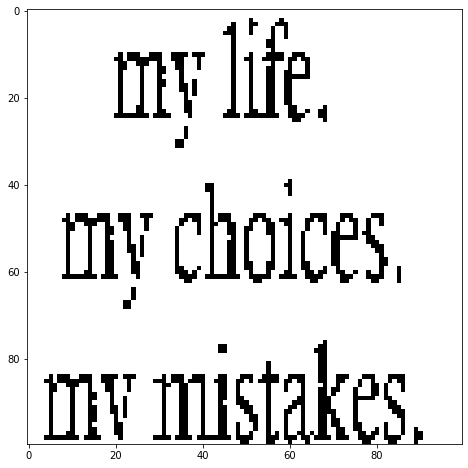

In [0]:
cover = Im.open("cover")
message = Im.open("message")
message = message.convert('1')
message = message.crop((100,50,500,250))
message = message.resize((100,100))
napis = np.array(message, dtype=np.int)
plt.figure(figsize = (8,8))
imshow(np.asarray(napis), cmap='gray')
p = np.array(cover)
p = p[:100,:100,0]
p_old = copy.copy(p)

Looping over whole cover image and adding message image - just one least significant bit

Image with coded message


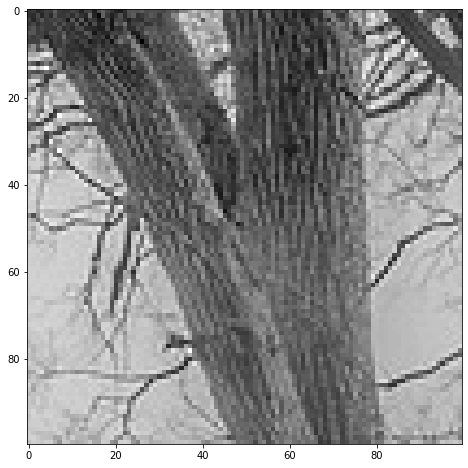

In [0]:
for x, y in np.nditer([p, napis], op_flags=['readwrite']):
  if x[...]%2 == 0:
    x[...] = x + y
  elif x[...]%2 == 1:
    if y == 0:
      x[...] = x + 1
new_im = Im.fromarray(p[:,:])
plt.figure(figsize = (8,8))
print("Image with coded message")
imshow(np.asarray(new_im), cmap='gray')

Original image


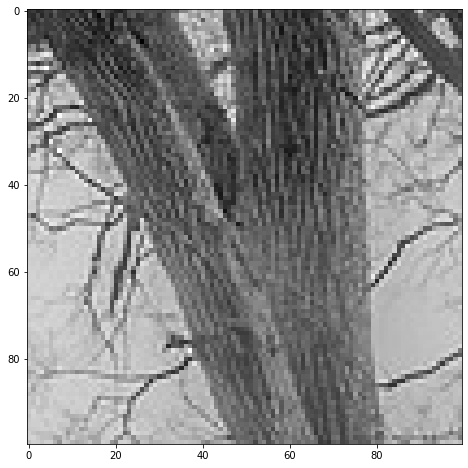

In [0]:
old_im = Im.fromarray(p_old)
plt.figure(figsize = (8,8))
print("Original image")
imshow(np.asarray(old_im), cmap='gray')

Message is extracted by subtracting stego image from original cover image

Message:


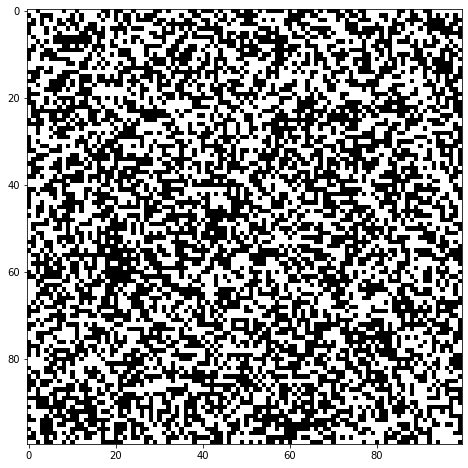

In [0]:
diff = p - p_old
mess_im = Im.fromarray(diff[:,:])
plt.figure(figsize = (8,8))
print("Message:")
imshow(np.asarray(mess_im), cmap='gray')

Message image extracted by only taking last bit in each pixel

(100, 100)


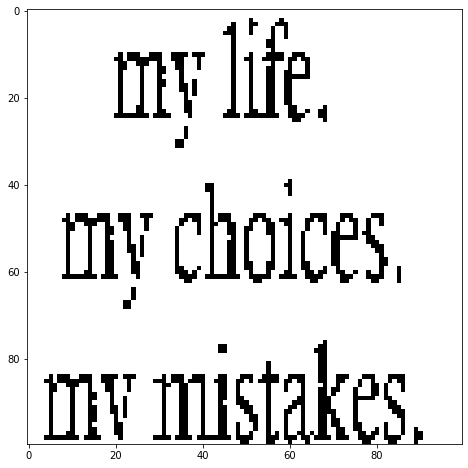

In [0]:
plt.figure(figsize = (8,8))
print(np.asarray(new_im).shape)
imshow(np.asarray(new_im)%2, cmap='gray')

Histogram of the stego-image

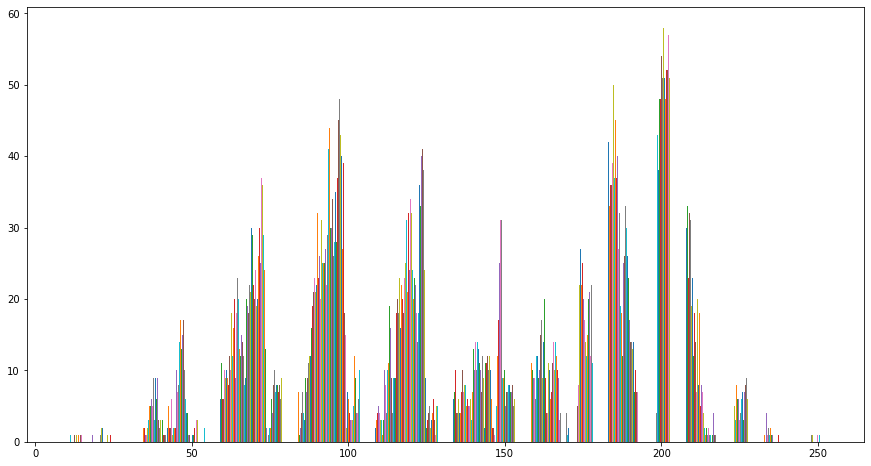

In [0]:
plt.figure(figsize = (15,8))
plt.hist(np.asarray(new_im));

Histogram of the original image

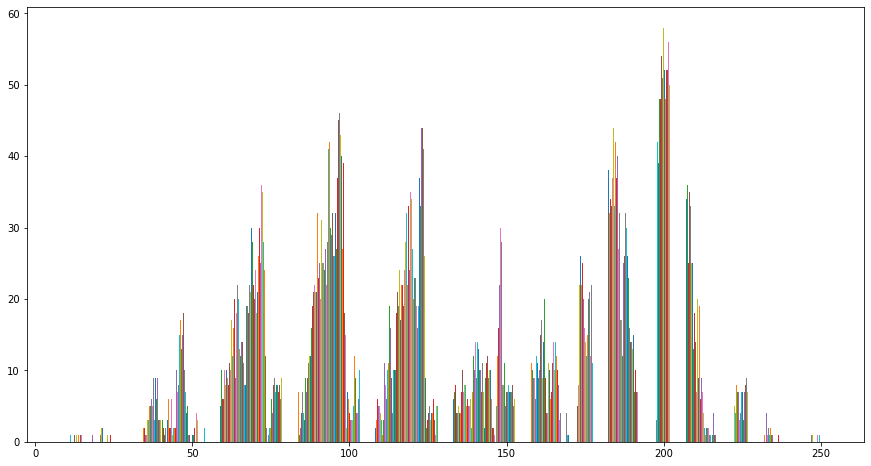

In [0]:
plt.figure(figsize = (15,8))
plt.hist(np.asarray(old_im));

Histogram of the arithmetic difference between images

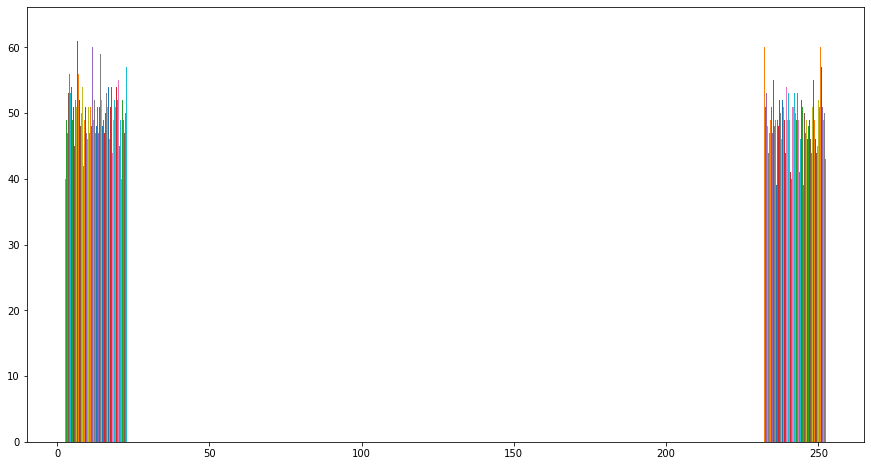

In [0]:
plt.figure(figsize = (15,8))
plt.hist(np.asarray(old_im) - np.asarray(new_im));

Bar plot of the differences between histograms of stego and original images

<BarContainer object of 256 artists>

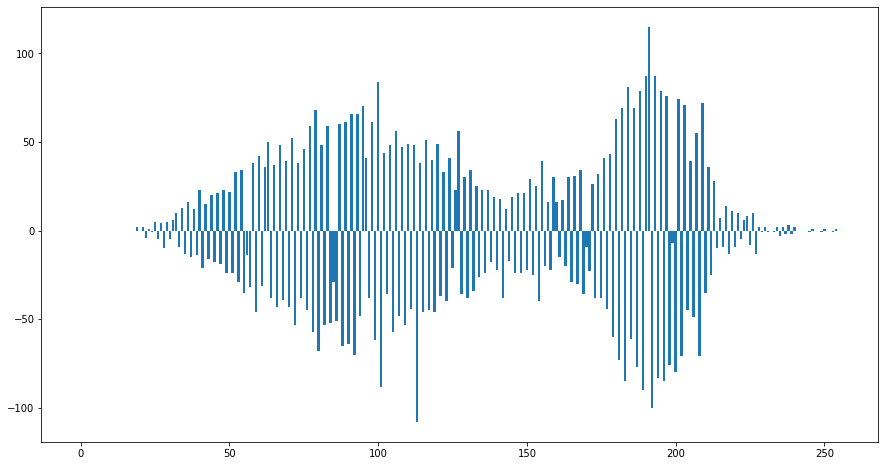

In [0]:
diff_hist = np.histogram(np.asarray(old_im), bins = 256)[0] - np.histogram(np.asarray(new_im), bins = 256)[0]
plt.figure(figsize = (15,8))
plt.bar(range(0,256),diff_hist)